# Breast-Cancer Tumour Classification
## Task 1 – Data Exploration
## Task 2 – Data Preparation
## Task 3 – Model Training
## Task 4 – Evaluation & Visualisation
## Task 5 – Conclusion & Future Work


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import itertools

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, RocCurveDisplay,
                             confusion_matrix, ConfusionMatrixDisplay,
                             classification_report)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

plt.style.use("default")  # keep plots clean for the report
RANDOM_STATE = 42         # reproducibility


In [13]:
df = pd.read_csv("breast_cancer_dataset.csv")  # place the CSV beside the notebook
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# **Task 01:**
- [ ] Class balance plot  
- [ ] df.describe() table  
- [ ] Histograms & box-plots  
- [ ] Pearson correlation heat-map


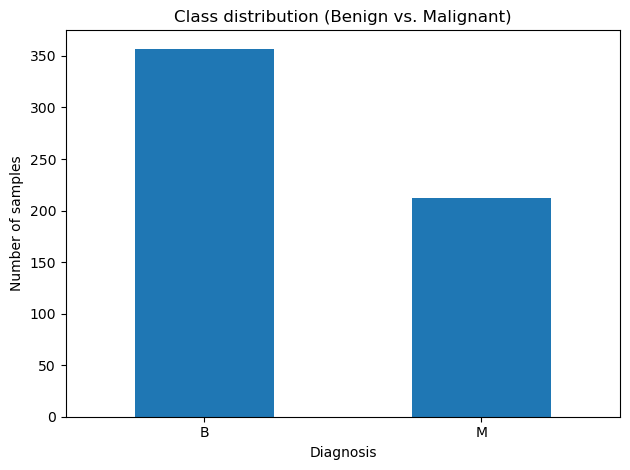

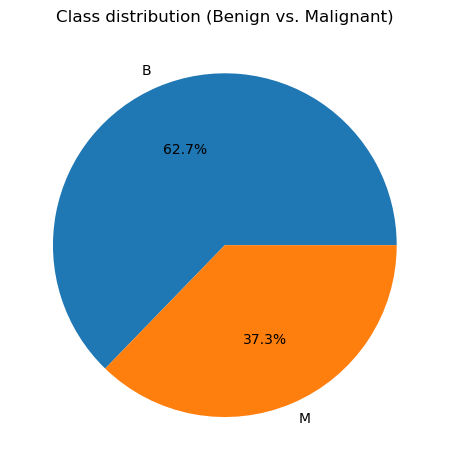

In [15]:
# Task: 1.1. Investigate the distribution of the target variable (Malignant vs. Benign). 

# Count benign (B) and malignant (M) samples
class_counts = df["diagnosis"].value_counts()   # returns a Series like: B 357, M 212

# ── BAR CHART (countplot equivalent) ──
plt.figure()
class_counts.plot(kind="bar")
plt.title("Class distribution (Benign vs. Malignant)")
plt.xlabel("Diagnosis")
plt.ylabel("Number of samples")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ── PIE CHART ──
plt.figure()
class_counts.plot(kind="pie", autopct="%1.1f%%")
plt.title("Class distribution (Benign vs. Malignant)")
plt.ylabel("")               # hide unnecessary y-label
plt.tight_layout()
plt.show()


``“The dataset contains 357 benign (63 %) and 212 malignant (37 %) cases.”``

**``Note``** that the class split is mildly imbalanced; you’ll keep this in mind when choosing metrics (focus on recall) or, if desired, apply re-sampling techniques such as SMOTE later in the workflow.

Shape of the DataFrame: (569, 32) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    flo

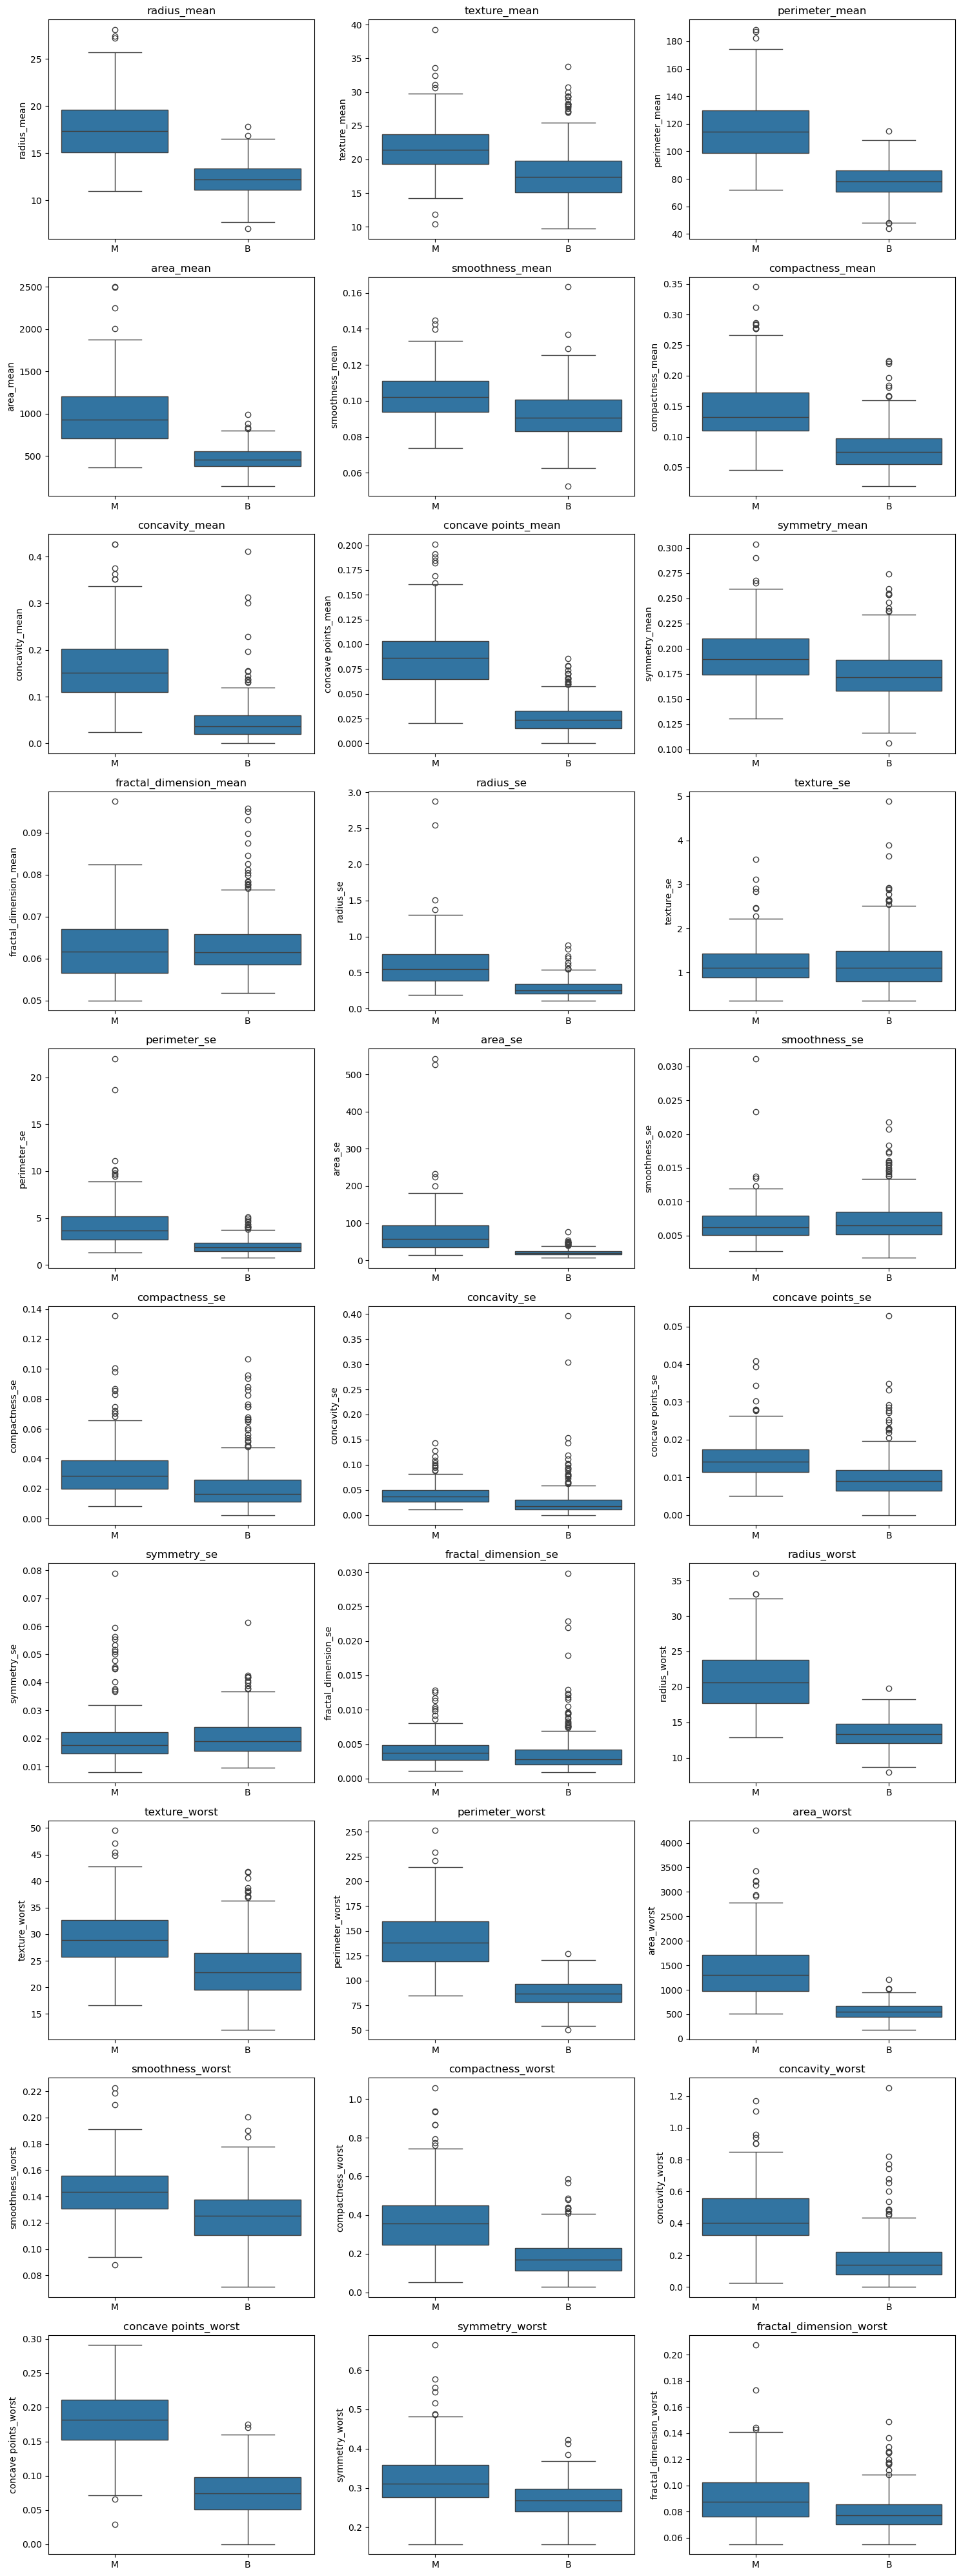

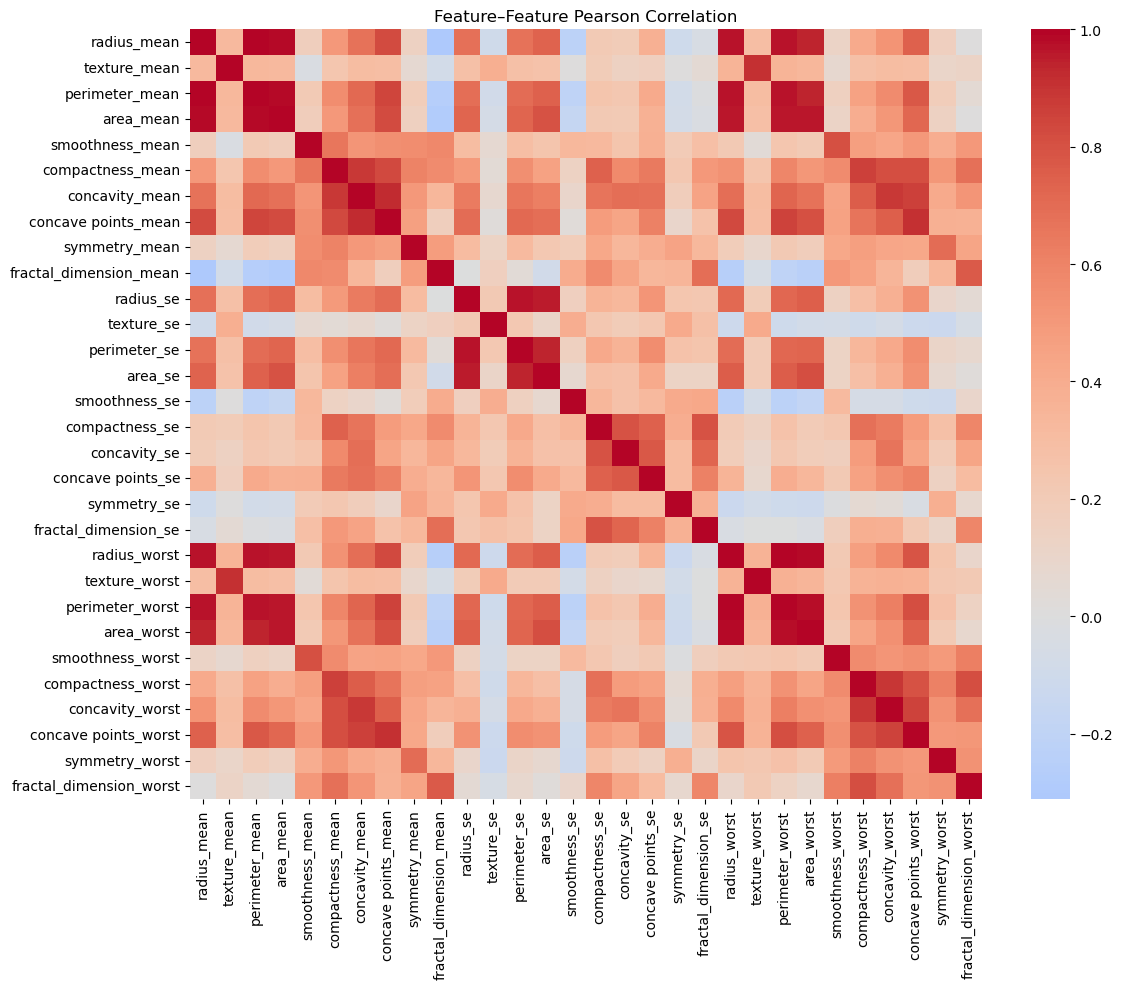


Highest std/mean ratios (possible skew/outliers):
area_se                 1.13
concavity_se            0.95
concavity_mean          0.90
concave points_mean     0.79
concavity_worst         0.77
perimeter_se            0.71
compactness_se          0.70
fractal_dimension_se    0.70
Name: std/mean, dtype: float64


In [17]:
# ─────────────────────────────────────────
# Task 1.2 – Descriptive statistics & EDA
# ─────────────────────────────────────────


# 2. BASIC INFO ───────────────────────────
print("Shape of the DataFrame:", df.shape, "\n")
print(df.info())

# 3. DESCRIPTIVE STATISTICS ───────────────
#    Build a table with mean, std, and the spread-to-centre ratio.
desc = (
    df.select_dtypes("number")
      .drop(columns="id")          # keep id out of the stats
      .describe()
      .T
)
desc["std/mean"] = desc["std"] / desc["mean"]
print("\nDescriptive statistics (excerpt):")
print(desc[["mean", "std", "std/mean"]].round(3).head())   # show first few rows

# 5. BOX-PLOTS FOR EVERY NUMERIC FEATURE ──
numeric_features = (
    df.drop(columns=["diagnosis", "id"])
      .select_dtypes("number")
      .columns
)
n_features = len(numeric_features)
ncols      = 3                           # three plots per row
nrows      = math.ceil(n_features / ncols)

plt.figure(figsize=(5 * ncols, 4 * nrows))
for idx, feature in enumerate(numeric_features, start=1):
    plt.subplot(nrows, ncols, idx)
    sns.boxplot(x="diagnosis", y=feature, data=df)
    plt.title(feature)
    plt.xlabel("")                       # save space
plt.tight_layout()
plt.show()

# 6. CORRELATION MATRIX ───────────────────
plt.figure(figsize=(12, 10))
corr = (
    df.drop(columns=["diagnosis", "id"])   # focus on predictors only
      .corr(method="pearson")
)
sns.heatmap(corr, cmap="coolwarm", center=0, fmt=".2f", annot=False)
plt.title("Feature–Feature Pearson Correlation")
plt.tight_layout()
plt.show()

# 7. OPTIONAL: LIST TOP std/mean RATIOS ───
print("\nHighest std/mean ratios (possible skew/outliers):")
print(desc["std/mean"].sort_values(ascending=False).head(8).round(2))


Observations:
1. Initial observations on data types, distributions, and potential outliers.
2. Observations on the relationship between the target and features based on the visualizations.
3. Observations on highly correlated features based on the correlation matrix.

In [18]:
# ---------------------------------------------------------
# Correlation heat-map  +  list of highly-correlated pairs
# ---------------------------------------------------------

# 1. Encode the target (needed only if you also want feature-to-target r)
df["diagnosis_num"] = df["diagnosis"].map({"B": 0, "M": 1})

# 2. Keep only numeric predictors (drop id & encoded target for heat-map)
features = df.drop(columns=["id", "diagnosis", "diagnosis_num"])


# 5. List pairs with |r| > 0.85
high_pairs = []
for i, j in itertools.combinations(range(len(corr)), 2):
    r = corr.iat[i, j]
    if abs(r) > 0.85:
        high_pairs.append((corr.index[i], corr.columns[j], r))

high_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

print(f"\nFound {len(high_pairs)} feature pairs with |r| > 0.85:\n")
for f1, f2, r in high_pairs:
    print(f"{f1:<25s}  ~  {f2:<25s}  r = {r:+.3f}")



Found 29 feature pairs with |r| > 0.85:

radius_mean                ~  perimeter_mean             r = +0.998
radius_worst               ~  perimeter_worst            r = +0.994
radius_mean                ~  area_mean                  r = +0.987
perimeter_mean             ~  area_mean                  r = +0.987
radius_worst               ~  area_worst                 r = +0.984
perimeter_worst            ~  area_worst                 r = +0.978
radius_se                  ~  perimeter_se               r = +0.973
perimeter_mean             ~  perimeter_worst            r = +0.970
radius_mean                ~  radius_worst               r = +0.970
perimeter_mean             ~  radius_worst               r = +0.969
radius_mean                ~  perimeter_worst            r = +0.965
area_mean                  ~  radius_worst               r = +0.963
area_mean                  ~  area_worst                 r = +0.959
area_mean                  ~  perimeter_worst            r = +0.959
radius

In [20]:
df.columns  # check the columns again, to see the new "diagnosis_num" column

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_num'],
      dtype='object')

In [21]:
# Correlation between the features and the target variables

df[features.columns.tolist() + ["diagnosis_num"]].corr()["diagnosis_num"].sort_values(ascending=False)

diagnosis_num              1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

# **Task 02:  Data Preparation**

1. Assign the diagnosis column as the target variable. 
2. Identify any missing values. 
3. Discuss and implement an appropriate imputation strategy (drop, mean, median, etc.) if 
needed. 
4. Use a scaling approach (StandardScaler, MinMaxScaler) to ensure numerical features share 
a similar range.


In [23]:
# Task-2.1: Drop columns that are *not* predictors
#     • 'diagnosis' is the label, not a feature
#     • 'id' is just an identifier
X = df.drop(columns=["diagnosis", "id", "diagnosis_num"])

# Encode the label column into numbers
#     Malignant → 1   •   Benign → 0
y = df["diagnosis_num"]


In [24]:
# Task-2.2: Check for missing values
df.isna().sum()  # check for missing values

# Task-2.3: Discuss and implement an appropriate imputation strategy (drop, mean, median, etc.) if needed.
# No missing values in the dataset, so no imputation needed.


# Task-2.4: Use a scaling approach (StandardScaler, MinMaxScaler) -
# to ensure numerical features share a similar range.

# Build the pipeline: StandardScaler  ➜  SVC
svm_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svc",    SVC(kernel="rbf", probability=True, random_state=42))
])
 
 
 # 1️⃣  Define a helper to build scaled / unscaled pipelines
def make_pipeline(model, scale=True):
    steps = []
    if scale:
        steps.append(("scaler", StandardScaler()))
    steps.append(("model", model))
    return Pipeline(steps)


In [27]:
for col in X.columns:
    df[col] = df[col].clip(lower=df[col].quantile(0.05), upper=df[col].quantile(0.95))
    
df_cleaned = df.copy()


# **Task 03: Model Training**: 
1. Split data into training and testing sets and explain the rationale for the chosen split ratio. 
2. Choose multiple classification algorithms (e.g., Logistic Regression, Support Vector Machine, 
Decision Tree, Random Forest, K-Nearest Neighbors). 
3. Train each chosen model on the training set. 
4. Record the default hyperparameters used initially. 

In [ ]:
# ----------------------------------------------------------------------------------------------------------
# Task 3.1: Split data into training and testing sets and explain the rationale for the chosen split ratio. 
# ----------------------------------------------------------------------------------------------------------


df = df_cleaned

# # Encode the label: Malignant = 1, Benign = 0
# df["diagnosis_num"] = df["diagnosis"].map({"M": 1, "B": 0})

X = df.drop(columns=["diagnosis", "diagnosis_num", "id"])   # predictors only
y = df["diagnosis_num"]

# Train–test split (80 / 20, stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=42
)


In [ ]:
# # ─────────────────────────────────────────────
# # Evaluate the SVM pipeline on the held-out set
# # ─────────────────────────────────────────────

# # 1️⃣  Get predictions and class-1 probabilities
# y_pred  = svm_pipe.predict(X_test)              # pipeline already scales
# y_proba = svm_pipe.predict_proba(X_test)[:, 1]  # needed for ROC-AUC

# # 2️⃣  Collect core metrics in a tidy Series
# metrics = pd.Series({
#     "Accuracy" : accuracy_score(y_test, y_pred),
#     "Precision": precision_score(y_test, y_pred),
#     "Recall"   : recall_score(y_test, y_pred),
#     "F1-score" : f1_score(y_test, y_pred),
#     "ROC-AUC"  : roc_auc_score(y_test, y_proba)
# }).round(3)

# print("Evaluation metrics:\n", metrics.to_string())

# # 3️⃣  Confusion-matrix heat-map (labelled)
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(4, 3))
# sns.heatmap(cm,
#             annot=True, fmt="d", cmap="Blues",
#             xticklabels=["Benign", "Malignant"],
#             yticklabels=["Benign", "Malignant"])
# plt.xlabel("Predicted label")
# plt.ylabel("True label")
# plt.title("SVM – Confusion Matrix")
# plt.tight_layout()
# plt.show()

# # 4️⃣  ROC curve
# plt.figure(figsize=(4, 4))
# RocCurveDisplay.from_predictions(y_test, y_proba)
# plt.title("SVM – ROC Curve")
# plt.tight_layout()
# plt.show()

# # 5️⃣  Full per-class report
# print("\nClassification report (Benign = 0, Malignant = 1):\n")
# print(classification_report(y_test, y_pred,
#                             target_names=["Benign", "Malignant"]))


In [ ]:
# Task 3.2: Choose multiple classification algorithms (e.g., Logistic Regression, Support Vector Machine, 
#                                                                Decision Tree, Random Forest, K-Nearest Neighbors). 

# Instantiate each classifier with sensible defaults
models = {
    "LogReg":    make_pipeline(LogisticRegression(max_iter=1000, random_state=42)),
    "SVM":       make_pipeline(SVC(kernel="rbf", probability=True, random_state=42)),
    "KNN":       make_pipeline(KNeighborsClassifier(n_neighbors=5)),
    "DecTree":   make_pipeline(DecisionTreeClassifier(random_state=42), scale=False),
    "RandForest":make_pipeline(RandomForestClassifier(
                    n_estimators=200, max_depth=None, random_state=42), scale=False)
}

In [ ]:
# Model training

# Subtask:
# Train a decision tree classifier on the prepared training data.


# Initialize the DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10)

# Train the model
dt_model.fit(X_train, y_train)

## **Task 4 – Evaluation & Visualisation**

1. Evaluate each model on the test set using accuracy, precision, recall, F1-score, and AUC. 
2. Present results in a clear table or multiple plots (e.g., confusion matrix, ROC curve). 
3. Discuss which model performed best and why (based on metrics). 
4.  Select the top-performing model(s) for further fine-tuning (e.g., using GridSearchCV or 
RandomizedSearchCV). 
5. Compare pre- vs. post-tuning performance to show improvements.

In [32]:
# Task - 4.1:   Evaluate each model on the test set using accuracy, precision, recall, F1-score, and AUC. 
# ──────────────────────────────────────────────
# 3️⃣  Train, predict, collect metrics
rows = []
for name, pipe in models.items():
    pipe.fit(X_train, y_train)
    y_pred  = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1] if hasattr(pipe[-1], "predict_proba") else None

    rows.append({
        "Model":      name,
        "Accuracy":   accuracy_score(y_test, y_pred),
        "Precision":  precision_score(y_test, y_pred),
        "Recall":     recall_score(y_test, y_pred),
        "F1":         f1_score(y_test, y_pred),
        "ROC-AUC":    roc_auc_score(y_test, y_proba) if y_proba is not None else float("nan")
    })

results = (pd.DataFrame(rows)
           .set_index("Model")
           .round(3)
           .sort_values("ROC-AUC", ascending=False))

print("Comparison of baseline models:\n")
display(results)        # Jupyter will show a neat table



Comparison of baseline models:



,Accuracy,Precision,Recall,F1,ROC-AUC
Model,,,,,
LogReg,0.982,1.000,0.952,0.976,0.997
SVM,0.974,0.976,0.952,0.964,0.995
RandForest,0.965,1.000,0.905,0.950,0.995
KNN,0.939,0.973,0.857,0.911,0.981
DecTree,0.939,0.973,0.857,0.911,0.922


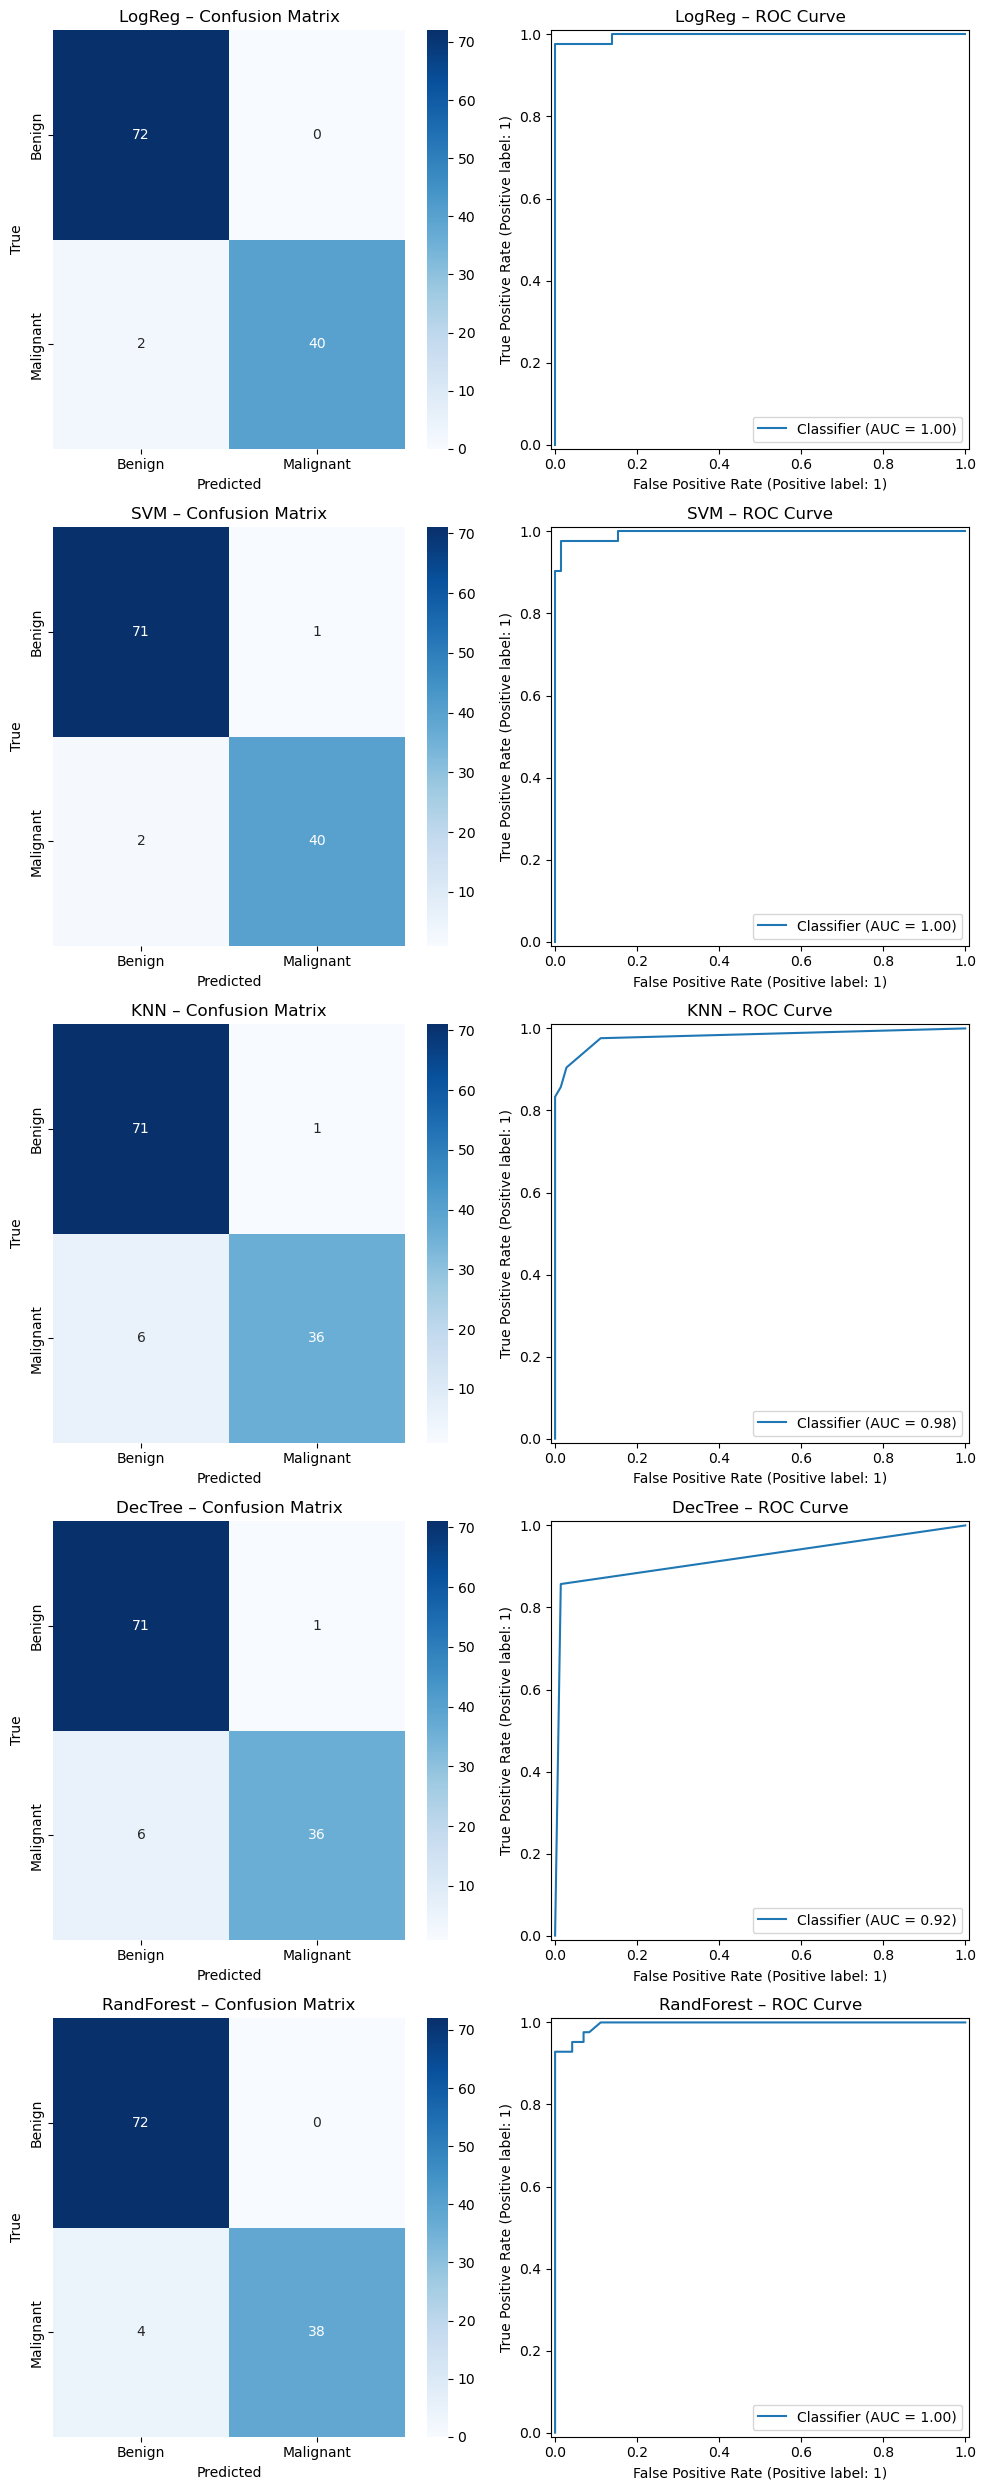


Classification report for LogReg:

              precision    recall  f1-score   support

      Benign       0.97      1.00      0.99        72
   Malignant       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

--------------------------------------------------

Classification report for SVM:

              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        72
   Malignant       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

--------------------------------------------------

Classification report for KNN:

              precision    recall  f1-score   support

      Benign       0.92      0.99      0.95        72
   Malignant       0.97      0.86

,Accuracy,Precision,Recall,F1-score,ROC-AUC
Model,,,,,
LogReg,0.982,1.000,0.952,0.976,0.997
SVM,0.974,0.976,0.952,0.964,0.995
RandForest,0.965,1.000,0.905,0.950,0.995
KNN,0.939,0.973,0.857,0.911,0.981
DecTree,0.939,0.973,0.857,0.911,0.922


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             RocCurveDisplay, classification_report)
import math

# Put every fitted model object into this dict (add tuned versions if you have them)
fitted_models = {
    "LogReg"      : models["LogReg"],            # baseline
    "SVM"         : models["SVM"],                    # tuned or baseline
    "KNN"         : models["KNN"],
    "DecTree"     : models["DecTree"],
    "RandForest"  : models["RandForest"],
    
}

metric_rows = []
model_names = list(fitted_models.keys())
n_models = len(model_names)

# Calculate grid size for subplots
ncols = 2  # 1 column for Confusion Matrix, 1 for ROC Curve per model
nrows = n_models

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 5 * nrows))

for idx, (name, mdl) in enumerate(fitted_models.items()):
    y_pred  = mdl.predict(X_test)
    y_prob  = mdl.predict_proba(X_test)[:, 1] if hasattr(mdl, "predict_proba") else None

    metric_rows.append({
        "Model"     : name,
        "Accuracy"  : accuracy_score(y_test, y_pred),
        "Precision" : precision_score(y_test, y_pred),
        "Recall"    : recall_score(y_test, y_pred),
        "F1-score"  : f1_score(y_test, y_pred),
        "ROC-AUC"   : roc_auc_score(y_test, y_prob) if y_prob is not None else float("nan")
    })

    # Plot confusion matrix in left column
    ax_cm = axes[idx, 0]
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Benign", "Malignant"],
                yticklabels=["Benign", "Malignant"],
                ax=ax_cm)
    ax_cm.set_xlabel("Predicted")
    ax_cm.set_ylabel("True")
    ax_cm.set_title(f"{name} – Confusion Matrix")

    # Plot ROC curve in right column
    ax_roc = axes[idx, 1]
    if y_prob is not None:
        RocCurveDisplay.from_predictions(y_test, y_prob, ax=ax_roc)
        ax_roc.set_title(f"{name} – ROC Curve")
    else:
        ax_roc.text(0.5, 0.5, 'No probas', horizontalalignment='center', verticalalignment='center')
        ax_roc.set_title(f"{name} – ROC Curve")
        ax_roc.set_axis_off()

plt.tight_layout()
plt.show()

# Print classification reports below the figure
for name, mdl in fitted_models.items():
    y_pred = mdl.predict(X_test)
    print(f"\nClassification report for {name}:\n")
    print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))
    print("-" * 50)

# Show summary metric table
results_all = (pd.DataFrame(metric_rows)
               .set_index("Model")
               .round(3)
               .sort_values("ROC-AUC", ascending=False))
print("\nOverall comparison:\n")
display(results_all)


In [ ]:
# ──────────────────────────────────────────────────────
# Task-4.3. Discuss which model performed best and why (based on metrics). 

In [42]:
# ──────────────────────────────────────────────────────
# Task 4.4 – Hyper-parameter tuning of top models
# ──────────────────────────────────────────────────────


# 0️⃣  Re-use the train/test split and helper functions from earlier
def collect_metrics(model, X_test, y_test, label):
    """Return a dict of evaluation metrics for the given model."""
    y_pred  = model.predict(X_test)
    y_proba = (model.predict_proba(X_test)[:, 1]
               if hasattr(model, "predict_proba") else None)
    return {
        "Model":      label,
        "Accuracy":   accuracy_score(y_test, y_pred),
        "Precision":  precision_score(y_test, y_pred),
        "Recall":     recall_score(y_test, y_pred),
        "F1":         f1_score(y_test, y_pred),
        "ROC-AUC":    roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
    }

# 1️⃣  Hyper-parameter grids  (tweak ranges if you like)
param_grid_rf = {
    "model__n_estimators":  [100, 200, 300],
    "model__max_depth":     [None, 8, 12, 16],
    "model__min_samples_leaf": [1, 2, 4]
}

param_grid_svm = {
    # "model__C":     [0.1, 1, 10, 100],
    # "model__gamma": ["scale", 0.01, 0.005, 0.001]
    'model__C': [0.1, 1, 10], 
    'model__gamma': [0.001, 0.01, 0.1, 1], 
    'model__kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

param_grid_dectree = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

param_grid_logreg = {
    "model__C": [0.01, 0.1, 1, 10, 100],
    "model__penalty": ["l2"],  # L2 regularization is standard for Logistic Regression
    "model__solver": ["lbfgs", "liblinear"]  # solvers that support L2 penalty
}

param_grid_knn = {
    "model__n_neighbors": [3, 5, 7, 9],
    "model__weights": ["uniform", "distance"],
    "model__algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
}


# 2️⃣  Wrap each original pipeline in GridSearchCV
gs_rf  = GridSearchCV(models["RandForest"], param_grid_rf,
                      cv=5, scoring="roc_auc", n_jobs=-1, verbose=1)
gs_svm = GridSearchCV(models["SVM"],        param_grid_svm,
                      cv=5, scoring="roc_auc", n_jobs=-1, verbose=1)

gs_dectree = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), 
                          param_grid=param_grid_dectree, scoring='roc_auc', refit='roc_auc', cv=5, n_jobs=-1)
gs_logreg = GridSearchCV(models["LogReg"], param_grid_logreg,
                        cv=5, scoring="roc_auc", n_jobs=-1, verbose=1)
gs_knn = GridSearchCV(models["KNN"], param_grid_knn,
                      cv=5, scoring="roc_auc", n_jobs=-1, verbose=1)

# 3️⃣  Fit the grid searches
print("⏳ Tuning Random Forest …")
gs_rf.fit(X_train, y_train)

print("\n⏳ Tuning SVM …")
gs_svm.fit(X_train, y_train)

print("\n⏳ Tuning Decision Tree …")
gs_dectree.fit(X_train, y_train)

print("\n⏳ Tuning Logistic Regression …")
gs_logreg.fit(X_train, y_train)

print("\n⏳ Tuning KNN …")
gs_knn.fit(X_train, y_train)


# 4️⃣  Compare before vs. after on the held-out test set
results_tuning = pd.DataFrame([
    collect_metrics(models["RandForest"], X_test, y_test, "RF baseline"),
    collect_metrics(gs_rf.best_estimator_, X_test, y_test, "RF tuned"),
    collect_metrics(models["SVM"], X_test, y_test, "SVM baseline"),
    collect_metrics(gs_svm.best_estimator_, X_test, y_test, "SVM tuned"),
    collect_metrics(models["DecTree"], X_test, y_test, "Decision Tree baseline"),
    collect_metrics(gs_dectree.best_estimator_, X_test, y_test, "Decision Tree tuned"),
    collect_metrics(models["LogReg"], X_test, y_test, "Logistic Regression baseline"),
    collect_metrics(gs_logreg.best_estimator_, X_test, y_test, "Logistic Regression tuned"),
    collect_metrics(models["KNN"], X_test, y_test, "KNN baseline"),
    collect_metrics(gs_knn.best_estimator_, X_test, y_test, "KNN tuned")
    
]).set_index("Model").round(3)



print("\n── Performance before vs. after tuning ──")
display(results_tuning)

# 5️⃣  Show the best hyper-parameters
print("\nBest Random Forest params →", gs_rf.best_params_)
print("Best SVM params          →", gs_svm.best_params_)
print("Best Decision Tree params →", gs_dectree.best_params_)
print("Best Logistic Regression params →", gs_logreg.best_params_)
print("Best KNN params →", gs_knn.best_params_)
# 6️⃣  Show the best model's ROC-AUC on the test set
print("\nBest Random Forest ROC-AUC →", gs_rf.best_score_.round(3))
print("Best SVM ROC-AUC          →", gs_svm.best_score_.round(3))
print("Best Decision Tree ROC-AUC →", gs_dectree.best_score_.round(3))
print("Best Logistic Regression ROC-AUC →", gs_logreg.best_score_.round(3))
print("Best KNN ROC-AUC →", gs_knn.best_score_.round(3))



⏳ Tuning Random Forest …
Fitting 5 folds for each of 36 candidates, totalling 180 fits

⏳ Tuning SVM …
Fitting 5 folds for each of 48 candidates, totalling 240 fits

⏳ Tuning Decision Tree …

⏳ Tuning Logistic Regression …
Fitting 5 folds for each of 10 candidates, totalling 50 fits

⏳ Tuning KNN …
Fitting 5 folds for each of 32 candidates, totalling 160 fits

── Performance before vs. after tuning ──


,Accuracy,Precision,Recall,F1,ROC-AUC
Model,,,,,
RF baseline,0.965,1.000,0.905,0.950,0.995
RF tuned,0.974,1.000,0.929,0.963,0.995
SVM baseline,0.974,0.976,0.952,0.964,0.995
SVM tuned,0.974,1.000,0.929,0.963,0.996
Decision Tree baseline,0.939,0.973,0.857,0.911,0.922
Decision Tree tuned,0.921,0.923,0.857,0.889,0.952
Logistic Regression baseline,0.982,1.000,0.952,0.976,0.997
Logistic Regression tuned,0.974,1.000,0.929,0.963,0.996
KNN baseline,0.939,0.973,0.857,0.911,0.981



Best Random Forest params → {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__n_estimators': 100}
Best SVM params          → {'model__C': 1, 'model__gamma': 0.001, 'model__kernel': 'linear'}
Best Decision Tree params → {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Logistic Regression params → {'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Best KNN params → {'model__algorithm': 'auto', 'model__n_neighbors': 7, 'model__weights': 'distance'}

Best Random Forest ROC-AUC → 0.992
Best SVM ROC-AUC          → 0.997
Best Decision Tree ROC-AUC → 0.965
Best Logistic Regression ROC-AUC → 0.996
Best KNN ROC-AUC → 0.99


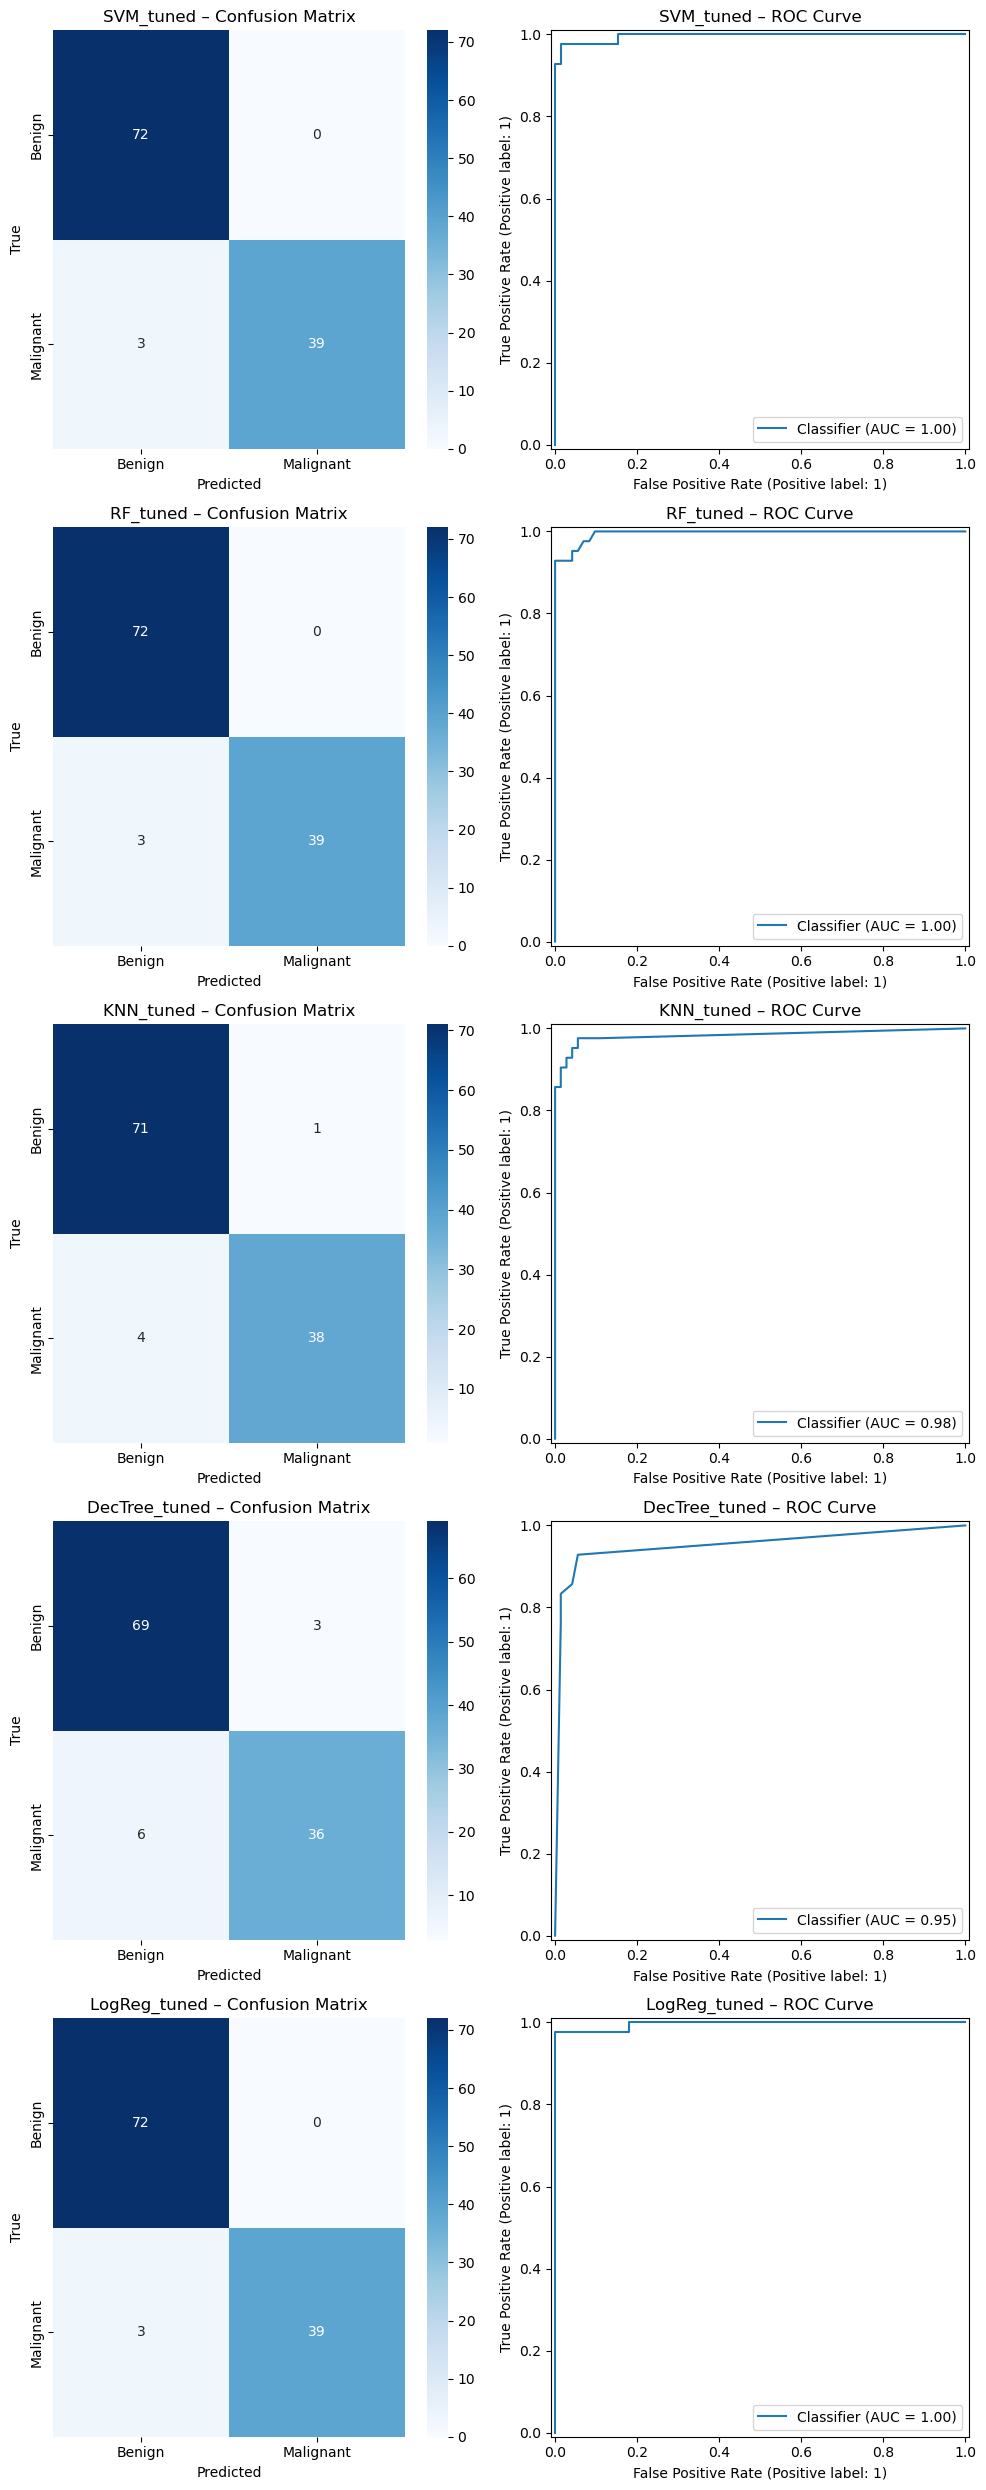


Classification report for SVM_tuned:

              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

--------------------------------------------------

Classification report for RF_tuned:

              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

--------------------------------------------------

Classification report for KNN_tuned:

              precision    recall  f1-score   support

      Benign       0.95      0.99      0.97        72
   Malignant       

,Accuracy,Precision,Recall,F1-score,ROC-AUC
Model,,,,,
SVM_tuned,0.974,1.000,0.929,0.963,0.996
LogReg_tuned,0.974,1.000,0.929,0.963,0.996
RF_tuned,0.974,1.000,0.929,0.963,0.995
KNN_tuned,0.956,0.974,0.905,0.938,0.983
DecTree_tuned,0.921,0.923,0.857,0.889,0.952


In [50]:
# Task-4.5. Compare pre- vs. post-tuning performance to show improvements.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             RocCurveDisplay, classification_report)
import math

fitted_models = {
    "SVM_tuned" : gs_svm.best_estimator_,  
    "RF_tuned"  : gs_rf.best_estimator_,
    "KNN_tuned" : gs_knn.best_estimator_,
    "DecTree_tuned": gs_dectree.best_estimator_,
    "LogReg_tuned": gs_logreg.best_estimator_ 
    
}

metric_rows = []
model_names = list(fitted_models.keys())
n_models = len(model_names)

# Calculate grid size for subplots
ncols = 2  # 1 column for Confusion Matrix, 1 for ROC Curve per model
nrows = n_models

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 5 * nrows))

for idx, (name, mdl) in enumerate(fitted_models.items()):
    y_pred  = mdl.predict(X_test)
    y_prob  = mdl.predict_proba(X_test)[:, 1] if hasattr(mdl, "predict_proba") else None

    metric_rows.append({
        "Model"     : name,
        "Accuracy"  : accuracy_score(y_test, y_pred),
        "Precision" : precision_score(y_test, y_pred),
        "Recall"    : recall_score(y_test, y_pred),
        "F1-score"  : f1_score(y_test, y_pred),
        "ROC-AUC"   : roc_auc_score(y_test, y_prob) if y_prob is not None else float("nan")
    })

    # Plot confusion matrix in left column
    ax_cm = axes[idx, 0]
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Benign", "Malignant"],
                yticklabels=["Benign", "Malignant"],
                ax=ax_cm)
    ax_cm.set_xlabel("Predicted")
    ax_cm.set_ylabel("True")
    ax_cm.set_title(f"{name} – Confusion Matrix")

    # Plot ROC curve in right column
    ax_roc = axes[idx, 1]
    if y_prob is not None:
        RocCurveDisplay.from_predictions(y_test, y_prob, ax=ax_roc)
        ax_roc.set_title(f"{name} – ROC Curve")
    else:
        ax_roc.text(0.5, 0.5, 'No probas', horizontalalignment='center', verticalalignment='center')
        ax_roc.set_title(f"{name} – ROC Curve")
        ax_roc.set_axis_off()

plt.tight_layout()
plt.show()

# Print classification reports below the figure
for name, mdl in fitted_models.items():
    y_pred = mdl.predict(X_test)
    print(f"\nClassification report for {name}:\n")
    print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))
    print("-" * 50)

# Show summary metric table
results_all = (pd.DataFrame(metric_rows)
               .set_index("Model")
               .round(3)
               .sort_values("ROC-AUC", ascending=False))
print("\nOverall comparison:\n")
display(results_all)


## **Task 5 – Conclusion & Future Work**

1. Summary of Findings 
   - Recap which model ultimately performed best. 
   - Highlight any key insights from the feature importance or metrics. 
   - Address data constraints (e.g., sample size, missing features) or any assumptions 
made. 
   - Discuss generalizability to other datasets or populations. 
2. Future Work 
   - Suggest additional techniques (e.g., more advanced models like neural networks) or 
feature engineering for improved results. 
   - Mention the potential for explainability in medical contexts.

In [ ]:
# Task 5: Please find in Report